# 生成单摆的哈密顿量数据

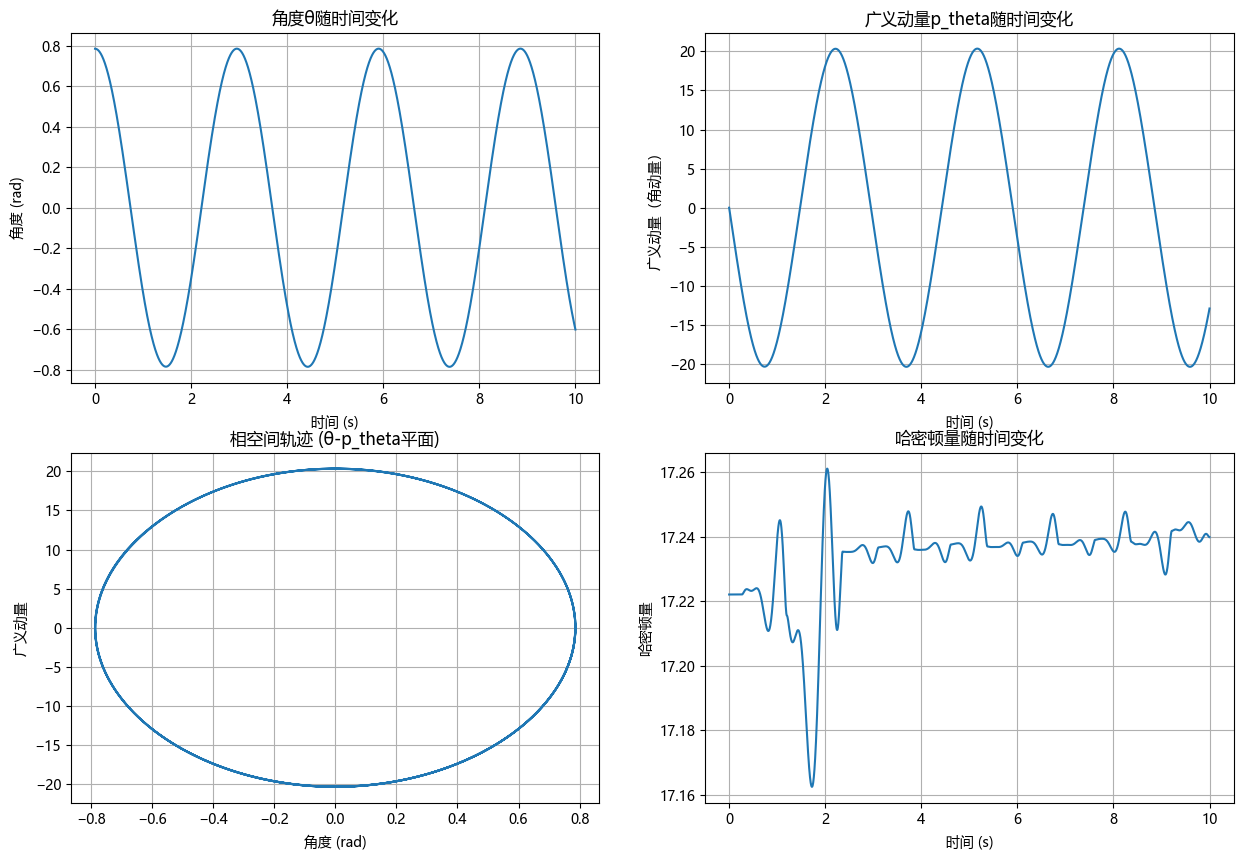

数据已保存到 'pendulum_hamilton_data.csv'
图表已保存到 'pendulum_hamilton_plots.png'

数据集前5行:
   角度θ(rad)  广义动量p_theta  角速度dθ/dt(rad/s)  dp_theta/dt      哈密顿量H
0  0.785398     0.000000         0.000000   -41.577879  17.222121
1  0.785387    -0.103970        -0.008664   -41.577428  17.222121
2  0.785355    -0.207938        -0.017328   -41.576077  17.222121
3  0.785301    -0.311902        -0.025992   -41.573825  17.222121
4  0.785225    -0.415859        -0.034655   -41.570672  17.222121


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pandas as pd
plt.rcParams['font.family'] = 'Microsoft YaHei'

# 参数设置
g = 9.8       # 重力加速度 (m/s^2)
l = 2.0       # 摆长 (m)
m = 3.0       # 质量 (kg)

# 定义哈密顿量
def hamiltonian(theta, p_theta):
    """
    计算单摆的哈密顿量 
    H = p_theta^2/(2ml^2) + mgl(1-cos(theta))
    其中p_theta是广义动量（角动量）
    """
    return p_theta**2/(2*m*l**2) + m*g*l*(1-np.cos(theta))

# 定义哈密顿正则方程
def hamilton_eqs(t, y):
    """
    哈密顿正则方程:
    dθ/dt = ∂H/∂p_theta = p_theta/(m*l^2)
    dp_theta/dt = -∂H/∂θ = -m*g*l*sin(θ)
    """
    theta, p_theta = y
    dtheta_dt = p_theta/(m*l**2)  # 从广义动量计算角速度
    dp_theta_dt = -m*g*l*np.sin(theta)
    return [dtheta_dt, dp_theta_dt]

# 设置初始条件和时间点
theta0 = np.pi/4    # 初始角度 (rad)
omega0 = 0.0        # 初始角速度 (rad/s)
p_theta0 = m*l**2*omega0  # 初始广义动量（角动量）
y0 = [theta0, p_theta0]   # 初始状态
t_span = (0, 10)    # 时间范围
t_eval = np.linspace(0, 10, 4000)  # 评估时间点

# 求解微分方程
sol = solve_ivp(hamilton_eqs, t_span, y0, t_eval=t_eval, method='DOP853')

# 提取结果
t = sol.t
theta = sol.y[0]
p_theta = sol.y[1]

# 计算导数
dtheta_dt = p_theta/(m*l**2)  # 角速度
dp_theta_dt = -m*g*l*np.sin(theta)  # 广义动量的导数

# 计算哈密顿量（应该保持守恒）
H = hamiltonian(theta, p_theta)

# 创建DataFrame
data = pd.DataFrame({
    '角度θ(rad)': theta,
    '广义动量p_theta': p_theta,
    '角速度dθ/dt(rad/s)': dtheta_dt,
    'dp_theta/dt': dp_theta_dt,
    '哈密顿量H': H
})

# 保存到CSV文件
data.to_csv('pendulum_hamilton_data.csv', index=False)

# 绘制结果
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(t, theta)
plt.title('角度θ随时间变化')
plt.xlabel('时间 (s)')
plt.ylabel('角度 (rad)')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(t, p_theta)
plt.title('广义动量p_theta随时间变化')
plt.xlabel('时间 (s)')
plt.ylabel('广义动量（角动量）')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(theta, p_theta)
plt.title('相空间轨迹 (θ-p_theta平面)')
plt.xlabel('角度 (rad)')
plt.ylabel('广义动量')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(t, H)
plt.title('哈密顿量随时间变化')
plt.xlabel('时间 (s)')
plt.ylabel('哈密顿量')
plt.grid(True)

plt.show()

print(f"数据已保存到 'pendulum_hamilton_data.csv'")
print(f"图表已保存到 'pendulum_hamilton_plots.png'")

# 显示数据的前几行
print("\n数据集前5行:")
print(data.head())


# 生成弹簧的数据

Equilibrium position: x_eq = 0.902 m


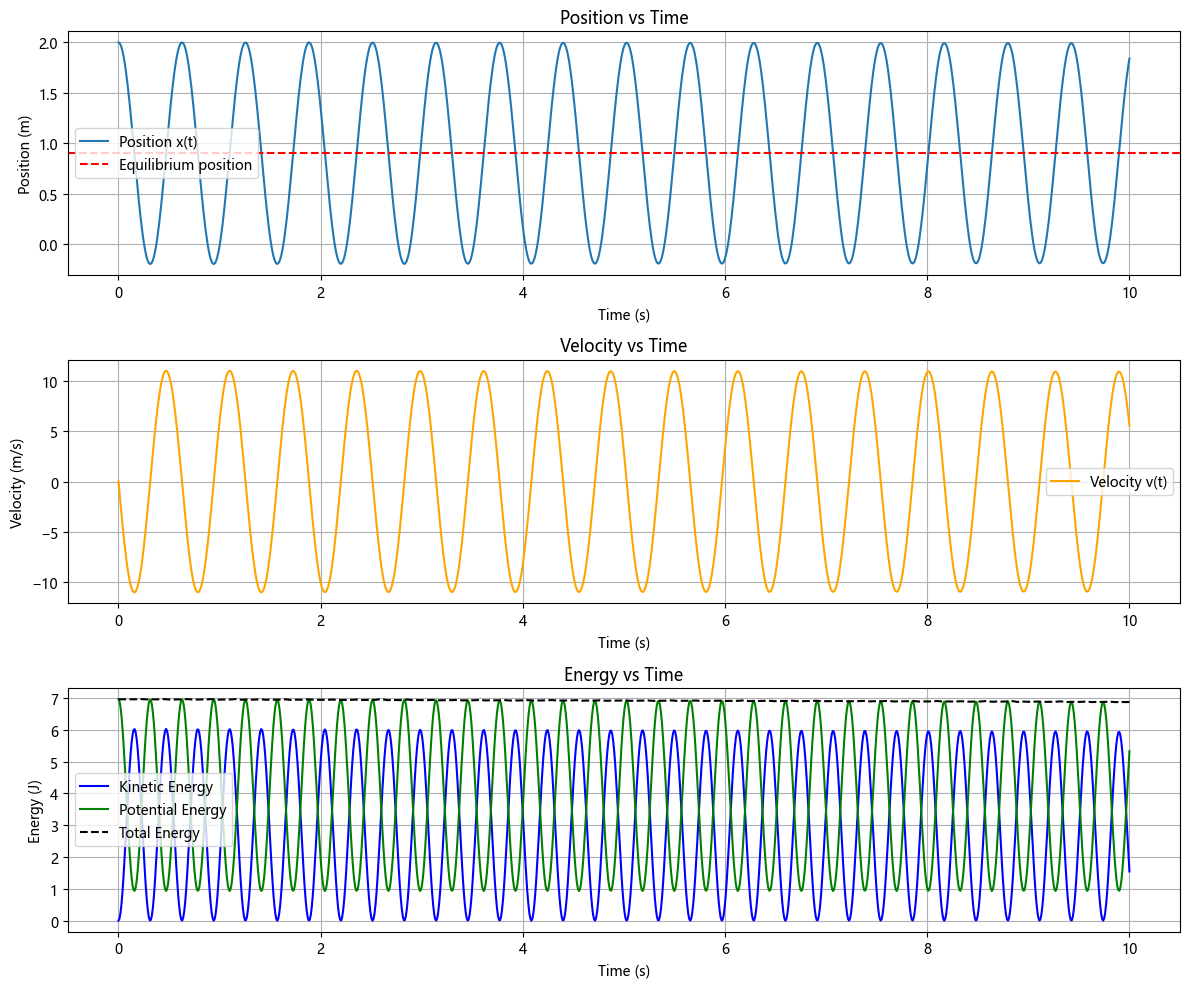

Theoretical angular frequency: ω = 10.000 rad/s
Theoretical period: T = 0.628 s


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
m = 0.1          # mass of the ball (kg)
k = 10.0         # spring constant (N/m)
L0 = 1.0         # natural length of the spring (m)
g = 9.81         # gravitational acceleration (m/s^2)

# Equilibrium position: x_eq = L0 - mg/k
x_eq = L0 - m * g / k
print(f"Equilibrium position: x_eq = {x_eq:.3f} m")

# System of ODEs
def equations(t, state):
    x, v = state
    dx_dt = v
    dv_dt = -(k / m) * (x - L0) - g
    return [dx_dt, dv_dt]

# Energy functions for analysis
def kinetic_energy(state):
    _, v = state
    return 0.5 * m * v**2

def potential_energy(x):
    # Gravitational potential energy (reference at x=0)
    V_g = m * g * x
    # Spring potential energy
    V_s = 0.5 * k * (x - L0)**2
    return V_g + V_s

# Initial conditions: start slightly above equilibrium
x0 = 2*l0  # initial position (m)
v0 = 0.0         # initial velocity (m/s)
initial_state = [x0, v0]

# Time span for simulation
t_span = (0, 10)  # simulate for 10 seconds
t_eval = np.linspace(0, 10, 1000)  # time points for output

# Solve ODE
solution = solve_ivp(equations, t_span, initial_state, method='DOP853', t_eval=t_eval)

# Extract results
t = solution.t
x = solution.y[0]
v = solution.y[1]

# Compute energies
KE = np.array([kinetic_energy([x[i], v[i]]) for i in range(len(x))])
PE = np.array([potential_energy(x[i]) for i in range(len(x))])
total_energy = KE + PE

# Plot results
plt.figure(figsize=(12, 10))

# Position vs Time
plt.subplot(3, 1, 1)
plt.plot(t, x, label='Position x(t)')
plt.axhline(y=x_eq, color='r', linestyle='--', label='Equilibrium position')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Position vs Time')
plt.grid(True)
plt.legend()

# Velocity vs Time
plt.subplot(3, 1, 2)
plt.plot(t, v, label='Velocity v(t)', color='orange')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs Time')
plt.grid(True)
plt.legend()

# Energy vs Time
plt.subplot(3, 1, 3)
plt.plot(t, KE, label='Kinetic Energy', color='blue')
plt.plot(t, PE, label='Potential Energy', color='green')
plt.plot(t, total_energy, label='Total Energy', color='black', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.title('Energy vs Time')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Print theoretical frequency for comparison
omega = np.sqrt(k / m)
T = 2 * np.pi / omega
print(f"Theoretical angular frequency: ω = {omega:.3f} rad/s")
print(f"Theoretical period: T = {T:.3f} s")


Equilibrium position: q_eq = 0.902 m
Data saved to 'hamiltonian_spring_mass_energy_data.csv'


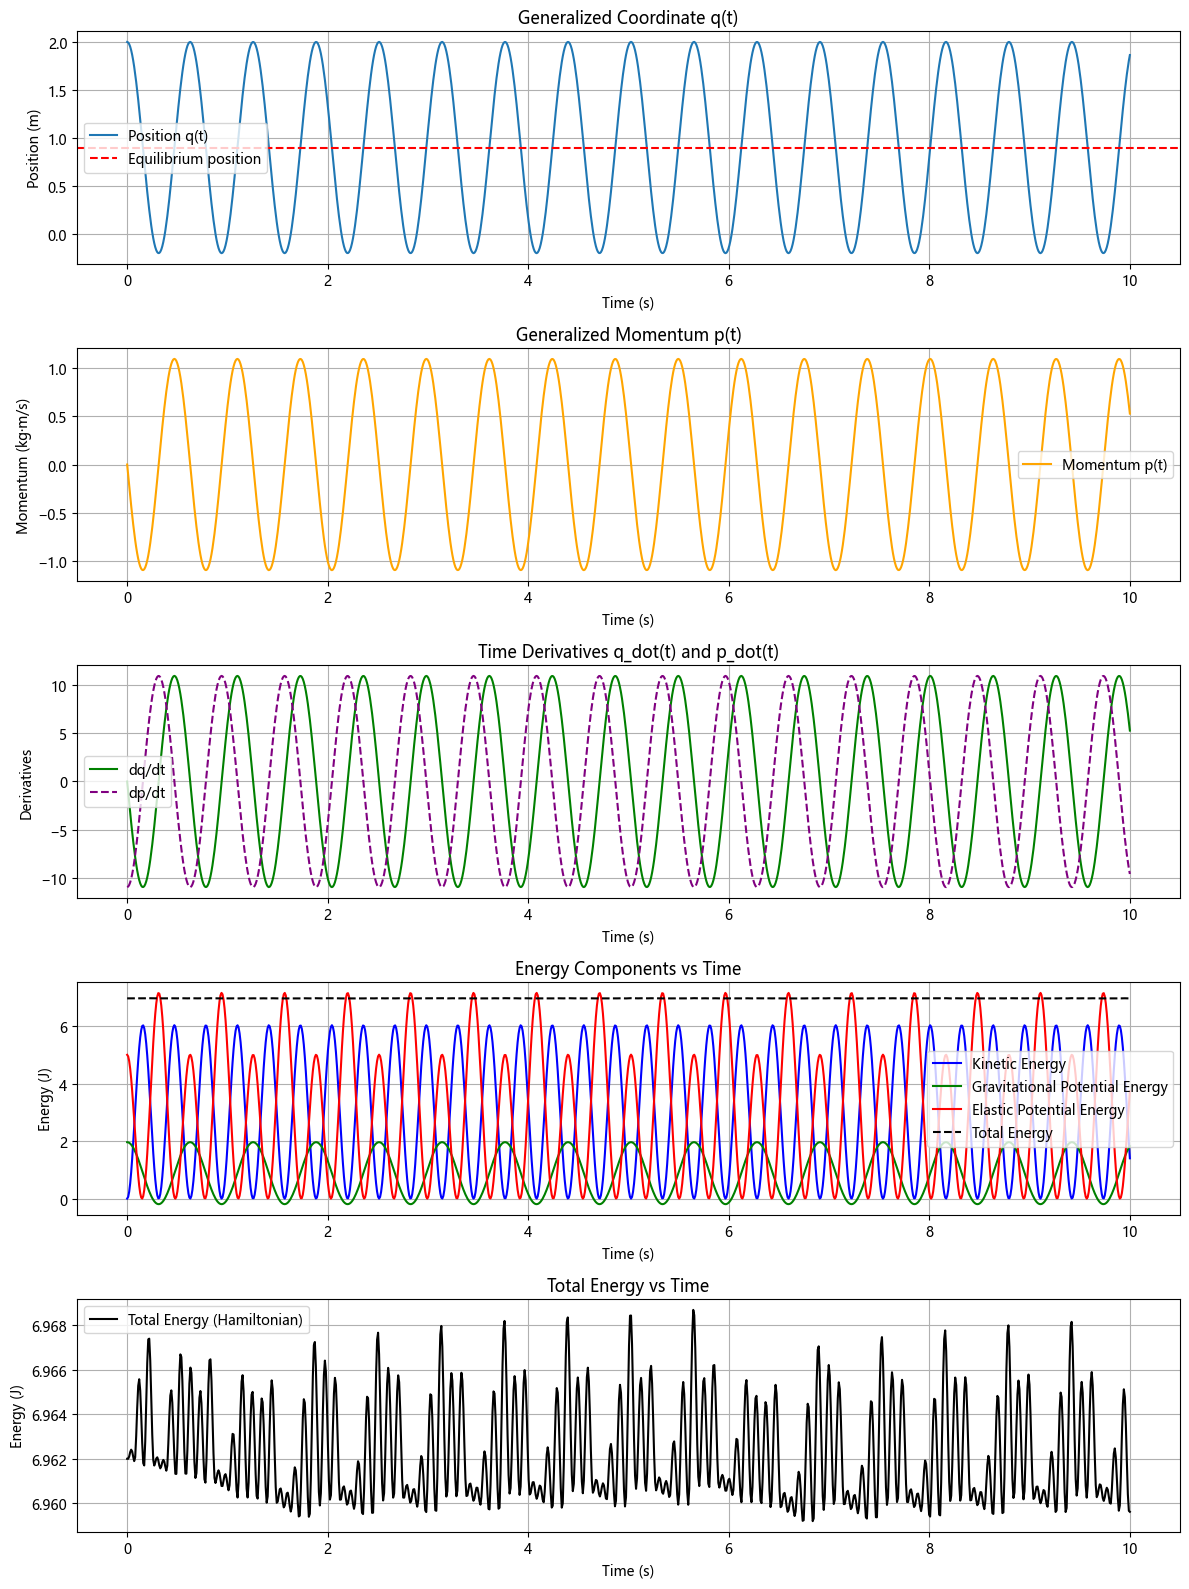

Theoretical angular frequency: ω = 10.000 rad/s
Theoretical period: T = 0.628 s


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pandas as pd

# Parameters
m = 0.1          # mass of the ball (kg)
k = 10.0         # spring constant (N/m)
L0 = 1.0         # natural length of the spring (m)
g = 9.81         # gravitational acceleration (m/s^2)

# Equilibrium position: q_eq = L0 - mg/k
q_eq = L0 - m * g / k
print(f"Equilibrium position: q_eq = {q_eq:.3f} m")

# Hamiltonian equations: dq/dt = p/m, dp/dt = -mg - k(q - L0)
def hamiltonian_eqs(t, state):
    q, p = state
    dq_dt = p / m
    dp_dt = -m * g - k * (q - L0)
    return [dq_dt, dp_dt]

# Energy functions
def kinetic_energy(p):
    return p**2 / (2 * m)

def gravitational_potential_energy(q):
    return m * g * q

def elastic_potential_energy(q):
    return 0.5 * k * (q - L0)**2

def hamiltonian(q, p):
    return kinetic_energy(p) + gravitational_potential_energy(q) + elastic_potential_energy(q)

# Initial conditions
q0 = 2*L0  # initial position (m)
p0 = 0.0         # initial momentum (kg·m/s)
initial_state = [q0, p0]

# Time span for simulation
t_span = (0, 10)  # simulate for 10 seconds
t_eval = np.linspace(0, 10, 1000)  # time points for output

# Solve ODE
solution = solve_ivp(hamiltonian_eqs, t_span, initial_state, method='RK45', t_eval=t_eval)

# Extract results
t = solution.t
q = solution.y[0]  # generalized coordinate q(t)
p = solution.y[1]  # generalized momentum p(t)

# Compute derivatives
q_dot = p / m  # dq/dt = p/m
p_dot = -m * g - k * (q - L0)  # dp/dt = -mg - k(q - L0)

# Compute energies
T = np.array([kinetic_energy(p[i]) for i in range(len(p))])  # Kinetic energy
V_g = np.array([gravitational_potential_energy(q[i]) for i in range(len(q))])  # Gravitational potential
V_s = np.array([elastic_potential_energy(q[i]) for i in range(len(q))])  # Elastic potential
H = T + V_g + V_s  # Total energy (Hamiltonian)

# Save data to CSV
'''data = {
    'time': t,
    'q': q,
    'p': p,
    'q_dot': q_dot,
    'p_dot': p_dot,
    'kinetic_energy': T,
    'gravitational_potential_energy': V_g,
    'elastic_potential_energy': V_s,
    'total_energy': H
}'''

data = {
    'q': q,
    'p': p,
    'q_dot': q_dot,
    'p_dot': p_dot,
    'total_energy': H
}

df = pd.DataFrame(data)
df.to_csv('hamiltonian_spring_mass_energy_data.csv', index=False)
print("Data saved to 'hamiltonian_spring_mass_energy_data.csv'")

# Plot results
plt.figure(figsize=(12, 16))

# Position q(t)
plt.subplot(5, 1, 1)
plt.plot(t, q, label='Position q(t)')
plt.axhline(y=q_eq, color='r', linestyle='--', label='Equilibrium position')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Generalized Coordinate q(t)')
plt.grid(True)
plt.legend()

# Momentum p(t)
plt.subplot(5, 1, 2)
plt.plot(t, p, label='Momentum p(t)', color='orange')
plt.xlabel('Time (s)')
plt.ylabel('Momentum (kg·m/s)')
plt.title('Generalized Momentum p(t)')
plt.grid(True)
plt.legend()

# Derivatives q_dot(t) and p_dot(t)
plt.subplot(5, 1, 3)
plt.plot(t, q_dot, label='dq/dt', color='green')
plt.plot(t, p_dot, label='dp/dt', color='purple', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Derivatives')
plt.title('Time Derivatives q_dot(t) and p_dot(t)')
plt.grid(True)
plt.legend()

# Energy components
plt.subplot(5, 1, 4)
plt.plot(t, T, label='Kinetic Energy', color='blue')
plt.plot(t, V_g, label='Gravitational Potential Energy', color='green')
plt.plot(t, V_s, label='Elastic Potential Energy', color='red')
plt.plot(t, H, label='Total Energy', color='black', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.title('Energy Components vs Time')
plt.grid(True)
plt.legend()

# Total energy (zoomed for clarity)
plt.subplot(5, 1, 5)
plt.plot(t, H, label='Total Energy (Hamiltonian)', color='black')
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.title('Total Energy vs Time')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Print theoretical frequency
omega = np.sqrt(k / m)
T_period = 2 * np.pi / omega
print(f"Theoretical angular frequency: ω = {omega:.3f} rad/s")
print(f"Theoretical period: T = {T_period:.3f} s")
